<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Cortez
- Nombre de alumno 2: Christopher Stears


### **Link de repositorio de GitHub:** [https://github.com/CHSTR/MDS7202_LAB](https://github.com/CHSTR/MDS7202_LAB)

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [3]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [4]:
labels = df_players["National_Position"].isna().apply(lambda X: "No seleccionado" if X else "Seleccionado")

In [5]:
labels.value_counts()

No seleccionado    16513
Seleccionado        1075
Name: National_Position, dtype: int64

In [6]:
labels.value_counts()/labels.shape[0]

No seleccionado    0.938879
Seleccionado       0.061121
Name: National_Position, dtype: float64

Vemos que **la gran mayoría** de los jugadores no son seleccionados nacionales. En total, sólo **1075** son seleccionados, representando a un 6.1% de los jugadores de la tabla, mientras que **16513** jugadores (93.9%) no son seleccionados.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

Para construir el column transformer de los valores numéricos exploramos las distribuciones mediante boxplots. Si en las distribuciones hay outliers muy alejados que dominan la escala de valores del atributo, entonces el escalamiento podría ser problemático.

<AxesSubplot:>

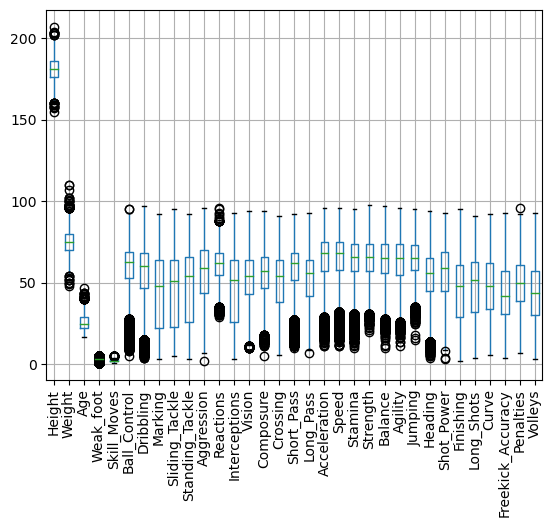

In [7]:
df_players.boxplot(rot = 90)

Vemos que en la mayoría de las escalas no hay outliers importantes. Revisamos en detalle Weak foot y Skill moves en el .html y vemos que son sólo 5 valores posibles por lo que no hay grandes outliers. De esta forma y como la mayoría de los atributos numéricos son puntajes del 0 al 100, uitilizaremos minmax scaler. Esto también para que queden en la misma escala que one hot encoding.

Para los atributos categóricos utilizaremos one hot encoding. Exploramos las variables categóricas.

In [8]:
df_players.select_dtypes(exclude = np.number).apply(lambda X: len(set(X)))

Name                 17341
Nationality            160
National_Position       28
Club_Position           30
Preffered_Foot           2
Work_Rate                9
dtype: int64

Nos percatamos que no tiene sentido transformar 'Name' ya que son identificadores de jugador (casi únicos). También excluiremos la columna 'National_Position' ya que fue construida para obtener el target.

Agregamos el argumento *handle_unknowns = 'ignore'* para no considerar categorías que aparezcan en transform que no estaban en el momento de hacer fit. Esto tiene sentido si se realiza train test split, ya que algunas columnas como nacionalidad tienen tantos valores distintos que es posible que alguno de ellos no aparezca en el conjunto de entrenamiento.

In [9]:
columns_numeric = df_players.select_dtypes(np.number).columns
columns_categoric = df_players.select_dtypes(
    exclude = np.number).columns.difference(["Name", "National_Position"])

In [10]:
ct = ColumnTransformer([
    ("MinMax", MinMaxScaler(), columns_numeric),
    ("OneHot", OneHotEncoder(handle_unknown = "ignore"), columns_categoric),
])


Luego, creamos los pipelines para entrenar el modelo. Al ver la guía, nos percatamos que como queremos predecir una **categoría** de la cual **poseemos la etiqueta**, entonces entramos en el área de la **clasificación** (aprendizaje supervizado).

> Observamos que la guía nos recomienda elegir clasificadores de acuerdo a las características del dataset y según si funcionaron o no, de manera que si la seguimos al pie de la letra podríamos elegir sólo un clasificador. Así, ignoraremos algunas de las reglas para generar pipelines con 3 clasificadores. En una primera mirada, vemos que no se encuentra *nuestro viejo amigo random forest* (uno de los mejores clasificadores) y que la grandiosa regresión logística está delegada a la categoría genérica `SGD classifier`.

Al tener menos de 100 000 filas, la guía nos recomienda comenzar con SVC lineal que es el clasificador basado en **Support Vector Machines**. Esto, ya que es uno de los clasificadores con mejor desempeño cuyo principal problema es que toma más tiempo en entrenar que otros clasificadores, por lo que si el volumen de datos no es demasiado grande es factible de utilizar. Utilizamos el regularizador `C=1` por defecto de SVM. Elegimos un kernel lineal ya que es la recomendación de la guía.

In [11]:
from sklearn.svm import SVC

pipeline_svm = Pipeline([
    ("preprocesamiento", ct),
    ("svm", SVC(kernel ='linear'))
])

Luego, la guía nos recomienda pasar a **KNN** ya que no contamos con datos de texto. Sin embargo, KNN sufre inmensamente de la maldición de la dimensionalidad y de tener muchas filas. Sería conveniente sólo utilizar algunas variables continuas, pero como debemos utilizar el mismo column transformer, ignoramos la guía y optamos por **Naive Bayes**.

Para aplicarlo correctamente, se debería por separado entrenar las variables numéricas y las categóricas y luego multiplicar las probabilidades para obtener la predicción. Pero esto requiere de muchos pasos y definir clases custom, lo cual es trabajo innecesario. Como Naive Bayes *no se hace problemas y funciona igual* si le pasamos las variables categóricas en la forma one hot encoding y asumimos distribución Gaussiana, procedemos. Agregamos la función toarray() para tratar los datos como una matriz real para poder usar el clasificador.

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, TransformerMixin

class UnSparce(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.toarray()

pipeline_nb = Pipeline([
    ("preprocesamiento", ct),
    ("unsparce", UnSparce()),
    ("knn", GaussianNB())
])

Finalmente, la guía nos recomienda usar SVM no lineal, pero como ya usamos SVM nos iremos al maravilloso mundo de los clasificadores entrenados mediante SGD, ignorando la recomendación de usarlos si tenemos más de 100 000 filas. Específicamente, usaremos **Regresión Logística**, el cual si bien no es tan preciso como SVM, podría ser más generalizable al depender de todos los datos en vez de sólo los datos cercanos al límite de decisión (support vectors). Al igual que el resto, *funciona igual* al pasarle variables categóricas en formato one hot encoding. Aumentamos max_iter para permitir que llegue a una solución.

In [13]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = Pipeline([
    ("preprocesamiento", ct),
    ("logreg", LogisticRegression(max_iter = 500))
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


Para mantener una distribución estratificada de las etiquetas de cada clase se utilizó el argumento `stratify = labels`.

In [14]:
X = df_players.drop(columns=['National_Position'])

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    labels, 
    test_size=0.30,
    random_state=86, 
    shuffle=True, 
    stratify=labels
)

In [15]:
players_svm = pipeline_svm.fit(X_train, y_train)
players_nb = pipeline_nb.fit(X_train, y_train)
players_logreg = pipeline_logreg.fit(X_train, y_train)

In [16]:
y_svm = players_svm.predict(X_test)
y_nb = players_nb.predict(X_test)
y_logreg = players_logreg.predict(X_test)

### Support Vector Machine

In [17]:
print(classification_report(y_test, y_svm))

                 precision    recall  f1-score   support

No seleccionado       0.95      0.99      0.97      4954
   Seleccionado       0.64      0.15      0.25       323

       accuracy                           0.94      5277
      macro avg       0.80      0.57      0.61      5277
   weighted avg       0.93      0.94      0.93      5277



In [18]:
print(y_test[y_test == "Seleccionado"].count())
print(confusion_matrix(y_test, y_svm))

323
[[4927   27]
 [ 274   49]]


### Naive Bayes

In [19]:
print(classification_report(y_test, y_nb))

                 precision    recall  f1-score   support

No seleccionado       1.00      0.18      0.31      4954
   Seleccionado       0.07      1.00      0.14       323

       accuracy                           0.23      5277
      macro avg       0.54      0.59      0.22      5277
   weighted avg       0.94      0.23      0.30      5277



In [20]:
print(confusion_matrix(y_test, y_nb))

[[ 902 4052]
 [   0  323]]


### Logistic regression

In [21]:
print(classification_report(y_test, y_logreg))

                 precision    recall  f1-score   support

No seleccionado       0.95      0.99      0.97      4954
   Seleccionado       0.64      0.25      0.36       323

       accuracy                           0.95      5277
      macro avg       0.80      0.62      0.67      5277
   weighted avg       0.93      0.95      0.93      5277



In [22]:
print(confusion_matrix(y_test, y_logreg))

[[4908   46]
 [ 242   81]]


**Respuesta**

Como sabemos que *precision* es la fracción de ejemplos correctamente predichos como clase positiva `Seleccionado` con respecto a todos los predichos como `Seleccionado` $\frac{TP}{TP + FP}$ (y lo mismo para la clase negativa `No seleccionado`). La métrica *recall* es la fracción de ejemplos positivos que son correctamente clasificados $\frac{TP}{TP + FN}$. El *F1-Score* combina la métrica *precision y recall* utilizando una media armónica $\frac{2*\text{precision * recall}}{precision + recall}$, y con esto en mente se analizarán los resultados obtenidos.


Para los distintos modelos entrenados se tiene:
- Support Vector Machine: Analizando las métricas y la matriz de confusión, vemos como la métrica *precision* alcanza un 64% para nuestra clase positiva, es decir, de 323 Seleccionados Nacionales nuestro modelo predice 279 correctamente. Si nos fijamos en todos los jugadores que deberían haber sido clasificados como `Seleccionados` Nacionales (*recall*), tenemos como resultado que tan solo un 15% de los jugadores `Seleccionados` fue correctamente clasificado. De todas formas, al observar el *F1-Score* para la clase positiva, volvemos a confirmar que el modelo **NO** logra realizar buenas predicciones para los jugadores `Seleccionados`, no así para aquellos `No seleccionados`, que para todas las métricas anteriores logran valores mayor o igual al 95%.

- Naive Bayes: Para Naive Bayes ocurre algo interesante. Si analizamos el reporte de métricas, vemos como *precision* tan solo alcanza el 7% para la clase positiva, es decir, el modelo predijo que habían 4375 Seleccionados nacionales, cuando solo hay 323 correctamente clasificados. Por otra parte, el *recall* para la clase positiva llega al 100%, pero claro, si observamos el *F1-Score* vemos que tanto para la clase positiva y negativa se obtienen valores bajos, esto principalmente se deber por las grandes diferencias entre *precision y recall*.

- Logistic Regression: Nótese que las métricas *precision y recall* del modelo `Logistic Regression` son similares a las del modelo `SVM`, con la diferencia que este modelo clasifica correctamente a más jugadores que son **seleccionados nacionales**. 


Finalmente, si comparamos la métrica *F1-Score* entre todos los modelos, vemos que para `Logistic Regression` se obtienen "mejores" resultados, aún así, ninguno modelos es capaz de realizar buenas predicciones, y esto se debe a la gran diferencia entre clases, ya que la gran mayoría de los jugadores **no son** seleccionados nacionales (solo un 6% sí lo es).


Una forma para intentar mejorar los resultados sería aplicando OverSampling, así se podría balancear la clase minoritaria hasta igualar la clase `No Seleccionado`. Otra forma interesante de solucionar este problema sería combinando OverSampling y *bagging* (*Ensemble methods*), así tendríamos una serie de estimadores que nos ayudarían a generalizar y tener mayor robustez a la hora de realizar las predicciones. 


## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

Primero definimos las etiquetas para utilizarlas más adelante. Las compactaremos en un diccionario para facilitar su uso.

In [23]:
posiciones_dic = {
    "ataque" : ['ST', 'CF'] ,
    "central_ataque" : ['RW', 'CAM', 'LW'] ,
    "central" : ['RM', 'CM', 'LM'] ,
    "central_defensa" : ['RWB', 'CDM', 'LWB'],
    "defensa" : ['RB', 'CB', 'LB'],
    "arquero" : ['GK']
}

Lo formateamos de la siguiente forma para poder utilizarlo en un apply

In [24]:
posicion_dic = {oripos:newpos for newpos in posiciones_dic for oripos in posiciones_dic[newpos]}

Luego tenemos un diccionario que nos permite remplazar facilmente. Eliminamos del dataframe los valores 'Sub' y 'Res' y cualquier otro valor que no esté en los indicados ya que no nos sirven.

In [25]:
df_clas = df_players[df_players["Club_Position"].apply(lambda X: X in posicion_dic)]
df_clas.shape

(3939, 39)

Finalmente, del dataset limpio (sin posisiones sub, res o valores NaN) extraemos la variable objetivo.

In [26]:
target = df_clas.Club_Position.apply(lambda X: posicion_dic[X])
target.value_counts()

defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: Club_Position, dtype: int64

<BarContainer object of 6 artists>

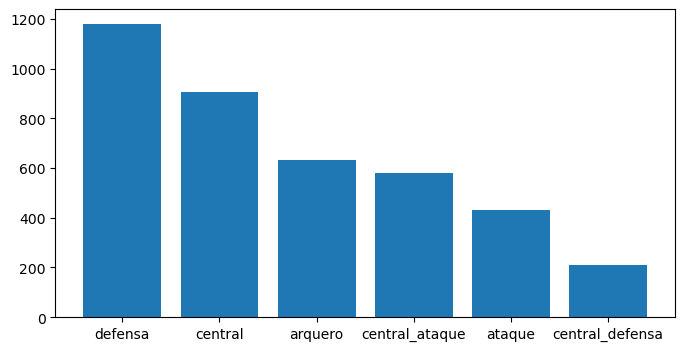

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.bar(target.value_counts().index, target.value_counts())

Observamos que la mayoría de los jugadores oficiales (no suplentes ni en la banca) de su club son defensas, seguido de mediocampistas, arqueros y finalmente ataque. Estamos ante un caso de clases desbalanceadas, pero con un "leve" desbalanceo ya que hay mucho menos que un orden de magnitud entre la se más representativa y la menos representativa. De todas maneras, debemos considerar esto a la hora de evaluar el modelo.

#### Elección del modelo

Como estamos intentando predecir una categoría, nuestro modelo cae dentro de los modelos de **clasificación**. Al ser menos de 100 000 filas, nos recomienda utilizar **Support Vector Machines**. Sin dudarlo por un segundo ~~aunque en 1.1.3 vimos que logistic regression da mejores métricas que SV y corre más rápido, es mas limpio, interpretable, lineal, generalizable y hermoso~~, cramos un pipeline para entrenar con este clasificador.

### SVM

Para esto, reciclaremos el mismo pipeline realizado en 1.1.2, pero lo modificaremos para que se descarte la variable `Club_Position`, ya que con ella se construyó el target. Para esto, tenemos que rehacer el column transformer para no incluir esta columna. Mantenemos el descarte de la columna `National_Position` ya que muy probablemente está fuertemente relacionada con `Club_Position` y es "trampa" ya que nos interesa saber en base a **los atributos del jugador** cual podría ser su posición (y además tiene muchos NaN).

In [28]:
columns_numeric = df_clas.select_dtypes(np.number).columns
columns_categoric = df_clas.select_dtypes(
    exclude = np.number).columns.difference(["Name", "National_Position", "Seleccionado", "Club_Position"])

ct2 = ColumnTransformer([
    ("MinMax", MinMaxScaler(), columns_numeric),
    ("OneHot", OneHotEncoder(handle_unknown = "ignore"), columns_categoric),
])

pipeline_svm_2 = Pipeline([
    ("preprocesamiento", ct2),
    ("svm", SVC(kernel ='linear'))
])

Luego entrenamos

In [29]:
svm = pipeline_svm_2.fit(df_clas, target)

Predecimos etiquetas

In [30]:
preds = svm.predict(df_clas)

Finalmente, calculamos métricas

In [31]:
print(classification_report(target, preds))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       632
         ataque       0.83      0.88      0.86       430
        central       0.65      0.73      0.69       907
 central_ataque       0.65      0.41      0.50       581
central_defensa       0.69      0.32      0.43       209
        defensa       0.84      0.97      0.90      1180

       accuracy                           0.79      3939
      macro avg       0.78      0.72      0.73      3939
   weighted avg       0.78      0.79      0.78      3939



Observamos que en general tuvo un buen desempeño, con una accuracy promedio de 0.79 y f1_score (macro promedio) de 0.73. No es completamente certero pero nos dice con suficiente confianza (en términos de estrategia de negocios) la posición en la que se podría poner a un nuevo jugador.

Sin embargo, son la métricas en train, por lo que el modelo podría estar sobreajustado. Pero debido a que las clases con peores métricas fueron `central_ataque` y `central_defensa`, entonces probablemente esto se debe a que son posiciones intermedias. Esto implicaría que si existe un correlato entre los atributos de los jugadores y su posición, y que en estos casos el mal desempeño se debería a que **las categorías en sí son difusas**. En contraste, arquero tuvo todas sus métricas perfectas, lo cual coincide con que es la posición que más se distingue del resto, seguido de defensa y ataque.

Visualizamos esto mediante una matriz de confusión.

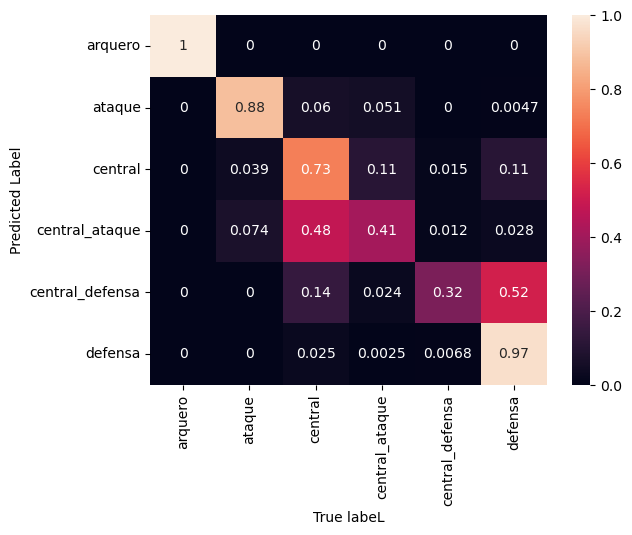

In [32]:
import seaborn as sns
CM = confusion_matrix(target, preds)

#Normalizamos por true label
CM = CM / np.sum(CM, axis = 1).reshape(-1, 1)

#Seaborn power
hm = sns.heatmap(CM, xticklabels = svm.classes_, yticklabels = svm.classes_, annot =True)
hm.set(xlabel='True labeL', ylabel='Predicted Label')
pass

Observamos que efectivamente clasificó erroneamente los central_defensa como defensas y los central_ataque como central, dando mayores indicios de que en general el clasificador tuvo un buen desempeño.


~~Como somos porfiados~~Para un análisis más robusto, repetiremos el procedimiento con regresión logística

### Logistic Regression

De manera análoga, aplicamos el pipeline.

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       632
         ataque       0.83      0.87      0.85       430
        central       0.63      0.68      0.65       907
 central_ataque       0.62      0.44      0.51       581
central_defensa       0.63      0.28      0.39       209
        defensa       0.82      0.95      0.88      1180

       accuracy                           0.78      3939
      macro avg       0.75      0.70      0.71      3939
   weighted avg       0.77      0.78      0.76      3939



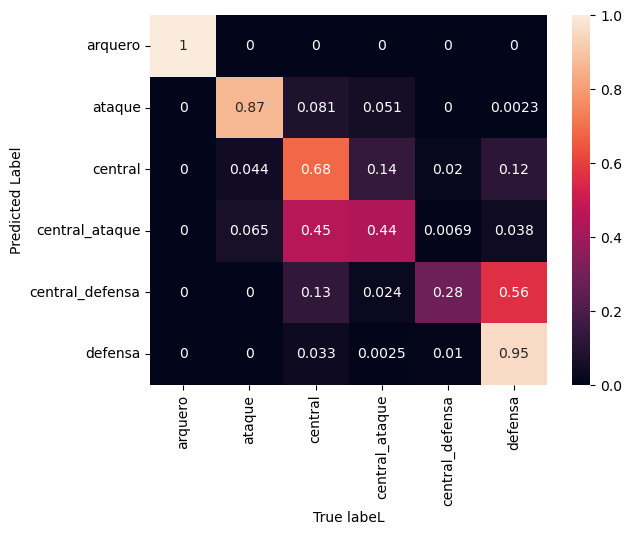

In [33]:
#Pipeline
pipeline_logreg_2 = Pipeline([
    ("preprocesamiento", ct2),
    ("logreg", LogisticRegression(max_iter = 500))
])

#Entrenamiento
logreg = pipeline_logreg_2.fit(df_clas, target)
#Predicciones
preds = logreg.predict(df_clas)

#Métricas
print(classification_report(target, preds))

#Matriz de confusión
CM = confusion_matrix(target, preds)
CM = CM / np.sum(CM, axis = 1).reshape(-1, 1)
hm = sns.heatmap(CM, xticklabels = logreg.classes_, yticklabels = logreg.classes_, annot =True)
hm.set(xlabel='True labeL', ylabel='Predicted Label')
pass

Observamos exactamente el mismo patrón que con SVM, pero con un desempeño levemente peor. Ante estos resultados, ~~juramos solemnemente siempre confiar en los criterios de SkLearn~~ concluimos que ante este problema sería preferible utilizar SVM. De todas formas, se debería evaluar si este resultado es efectivamente generalizable.

En una última exploración, realizaremos análisis para evaluar si el modelo está ajustado.

### Análisis de sobreajuste

Repetimos el pipeline, esta vez utilizando datos de validación. Sin embargo, en vez de realizar train_test_split, nos aventuramos por realizar *cross validation*, que es un mecanismo mucho más robusto de evaluar la generalizabilidad del modelo. Este consiste en dividir el dataset en una cierta cantidad (en este caso por 10) de subconjuntos, de los que se deja sólo 1 para evaluar y se entrena en el resto. Se itera hasta que todos los subconjuntos fueron utilizados para validar y luego se promedian las métricas.

In [51]:
from sklearn.model_selection import cross_validate

print("Realizando cross validation con modelo SVM..")
scores_svm = cross_validate(pipeline_svm_2, df_clas, target, cv=10, scoring = "f1_macro")
print("Realizando cross validation con modelo Regresión Logística..")
scores_logreg = cross_validate(pipeline_logreg_2, df_clas, target, cv=10, scoring = "f1_macro")

Realizando cross validation con modelo SVM..
Realizando cross validation con modelo Regresión Logística..


Graficamos y promediamos las métricas para determinar cual modelo tiene mejor desempeño en datos de test.

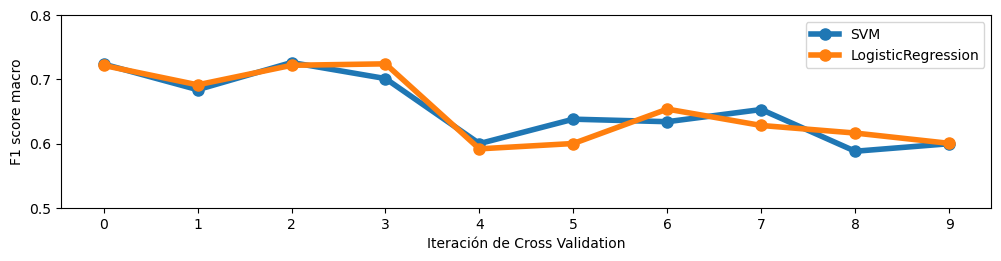

In [56]:
plt.figure(figsize = (12, 2.5))
plt.plot(scores_svm["test_score"],    marker='o', markersize = 8, linewidth=4, label="SVM")
plt.plot(scores_logreg["test_score"], marker='o', markersize = 8, linewidth=4, label="LogisticRegression")
plt.ylim((.5, .8))
plt.xticks(np.arange(10))
plt.xlabel("Iteración de Cross Validation")
plt.ylabel("F1 score macro")
plt.legend()
plt.show()

In [53]:
print("Promedio F1 SVM:", np.mean(scores_svm["test_score"]))
print("Promedio F1 LogisticRegression:", np.mean(scores_logreg["test_score"]))

Promedio F1 SVM: 0.6548170586074508
Promedio F1 LogisticRegression: 0.6549863166250517


Se comprueba que la regresión logística produce predicciones levemente más generalizables que SVM. Adicionalmente, observamos que en cross validation empeoraron las métricas respecto a la evaluación en datos de entrenamiento. Sin embargo, para ser predicciones en datos no vistos y con 6 categorías distintas los resultados no son del todo insatisfactorios. Observando la matriz de confusion, si se clasifica a un jugador en una posición, muy probablemente sea la correcta o alguna muy cercana.

De todas formas, sería ideal obtener un F1 score de al menos 0.8 para hablar de una clasificación realmente satisfactoria. Si queremos mejorar la clasificación, se podrían **eliminar las clases** `central_ataque` y `central_defensa` y predecir sin clases ambiguas. También ayudaría **aumentar la cantidad de datos** de entrenamiento.

Otra estrategia interesante sería **transformar el problema en uno de regresión**, ya que predecir como `defensa` a un jugador que es `central defensa` no es realmente equivocarse. El jugador efectivamente realiza labores defensivas, y probablemente ha jugado como defensa en otro club. Pero predecirlo como `Ataque` sí es un error muy penalizable, ya que salvo excepciones esto no sucede. Así, se podrían transformal las clases originales de `Club_Position` a un valor entre 0 y 1 que indique "Que tan atrás" juega. Así, penaliza menos a clasificaciones incorrectas a posiciones cercanas. Se tendría que setear a la posición más ofensiva como 1, a la más defensiva como 0.3 y al arquero como 0, para reflejar el hecho de que el arquero es una posición única.

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [x] Explique en que consiste la métrica $R^2$
- [x] Generar un pipeline para la regresión.
- [x] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [x] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

El coeficiente de determinación $R^2$, es una métrica que representa la proproción de varianza de las predicciones del modelo con respecto a los valores reales. Su formula se define como: $$R^2 = 1 - \frac{\sum_{i=1}(y_i - \hat{y_i})^2}{\sum_{i=1}(y_i - \overline{y_i})^2}$$
Donde y_i es el valor real, \hat{y_i} el valor predicho y \overline{y_i} es la media de los valores reales.

Entonces, con la métrica $R^2$ se quiere ver que tan bueno es nuestro modelo/regresión si la comparamos con una "regresión dummy". Por lo tanto, lo **ideal** es que el modelo esté lo más cercano a 1.

In [37]:
import matplotlib.pyplot as plt

In [38]:
df_sueldos = pd.read_csv('sueldos.csv')
df_sueldos = df_sueldos.drop(['Unnamed: 0'], axis=1)

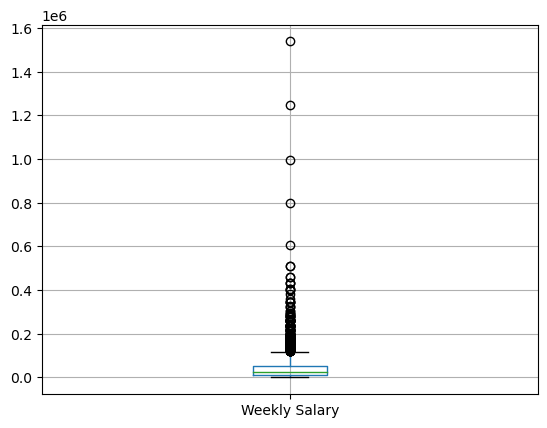

In [39]:
df_sueldos.boxplot()
plt.show()

In [40]:
df_player_salary = df_sueldos.merge(df_players, left_on="Player", right_on="Name")
df_player_salary = df_player_salary.drop_duplicates()

In [41]:
df_player_salary

,Player,Weekly Salary,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Lionel Messi,1538905.0,Lionel Messi,Argentina,RW,RW,170,72,Left,29,...,90,68,71,85,95,88,89,90,74,85
1,Cristiano Ronaldo,1248536.0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,...,90,95,85,92,93,90,81,76,85,88
2,Antoine Griezmann,997032.0,Antoine Griezmann,France,CAM,RS,176,67,Left,26,...,90,87,80,81,88,82,84,75,71,87
3,Neymar,797726.0,Neymar,Brazil,LW,LW,174,68,Right,25,...,96,61,62,78,89,77,79,84,81,83
4,Gareth Bale,607706.0,Gareth Bale,Wales,RS,RW,183,74,Left,27,...,77,85,86,91,87,90,86,85,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,Michael Langer,903.0,Michael Langer,Austria,NaN,GK,194,92,Right,32,...,22,50,14,15,14,13,12,12,13,11
1862,Nicolas Lemaître,859.0,Nicolas Lemaître,France,NaN,Res,185,83,Right,20,...,24,32,23,23,17,15,19,14,22,17
1863,Andrea Pinamonti,805.0,Andrea Pinamonti,Italy,NaN,Res,181,72,Right,17,...,65,65,62,57,74,60,43,43,69,43
1864,Tim Wiesner,674.0,Tim Wiesner,Germany,NaN,Res,192,87,Right,20,...,39,57,16,19,13,15,18,16,20,14


In [42]:
# Dividiendo los datos
salary = df_player_salary['Weekly Salary']
X = df_player_salary.drop(columns=['Weekly Salary', 'National_Position'])

X_train, X_test, y_train, y_test = train_test_split(X, salary, test_size=0.30, random_state=86)

In [43]:
X_train

,Player,Name,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
1849,Eric Oelschlägel,Eric Oelschlägel,Germany,Sub,193,87,Right,21,Medium / Medium,2,...,34,55,25,24,12,10,20,11,18,10
1787,Felix Götze,Felix Götze,Germany,Res,185,78,Right,19,Medium / Medium,2,...,38,61,64,41,26,27,29,28,30,33
1425,Yoan Cardinale,Yoan Cardinale,France,GK,181,84,Right,23,Medium / Medium,3,...,43,55,16,25,14,20,13,18,23,20
1472,Gen Shoji,Gen Shoji,Japan,LCB,182,74,Right,24,Medium / Medium,3,...,49,75,74,42,29,28,32,34,32,28
1101,Benjamin Hübner,Benjamin Hübner,Germany,LCB,193,82,Left,27,Medium / Medium,2,...,48,60,81,52,20,22,40,42,50,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,Matheus Pereira,Matheus Pereira,Brazil,Res,181,68,Left,19,Medium / Medium,3,...,69,53,52,58,60,52,73,64,62,66
1125,Abdul Rahman Baba,Abdul Rahman Baba,Ghana,Res,179,70,Left,22,High / Medium,3,...,78,76,67,59,48,47,67,23,42,41
1822,Bryan Passi,Bryan Passi,France,Res,189,78,Right,19,Medium / High,3,...,57,67,61,55,36,32,40,44,51,34
1454,Derrick Luckassen,Derrick Luckassen,Netherlands,LCB,185,75,Right,21,High / Medium,3,...,74,82,75,77,45,70,70,72,46,32


Al ver que debemos predecir el salario de los jugadores, y utilizando la guía para escoger un regresor vemos que nos recomienda un modelo lineal regularizado por SGD, debido a que no tenemos más de 100k registros. Para la creación del pipeline se utilizará el mismo preprocesamiento de los datos, seguido del SGDRegressor.

In [44]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
# Pipeline modelo lineal + SGD
pipeline_sgd = Pipeline([
    ("preprocesamiento", ct),
    ("sgd", SGDRegressor(random_state=86))
])

In [46]:
model_sgd = pipeline_sgd.fit(X_train, y_train)

In [47]:
y_pred = model_sgd.predict(X_test)
print("SGDRegressor R^2 => {}".format(r2_score(y_test, y_pred)))

SGDRegressor R^2 => 0.1890430251851858


Como vemos, al utilizar un regresor lineal regularizado con SGD se obtiene un $R^2$ igual a 0.19 aproximadamente, valor que **no** se encuentra sobre lo pedido, por lo que se entrenarán más modelos/regresores para encontrar aquel modelo que cumpla con un coeficiente de determinación $R^2$ mayor a 0.35.

In [48]:
# Ridge
pipeline_ridge = Pipeline([
    ("preprocesamiento", ct),
    ("ridge", Ridge(random_state=0))
])
model_ridge = pipeline_ridge.fit(X_train, y_train)

In [49]:
# Lasso
pipeline_lasso = Pipeline([
    ("preprocesamiento", ct),
    ("lasso", linear_model.LassoCV(random_state=0))
])
model_lasso = pipeline_lasso.fit(X_train, y_train)

In [66]:
# Gradient Boosting Regressor
pipeline_gbr = Pipeline([
    ("preprocesamiento", ct),
    ("gbr", GradientBoostingRegressor(n_estimators=50,
                                      max_depth=1,
                                      random_state=0,
                                     )
    )
])
model_gbr = pipeline_gbr.fit(X_train, y_train)

In [67]:
# Ada Boost Regressor
pipeline_abr = Pipeline([
    ("preprocesamiento", ct),
    ("abr", AdaBoostRegressor())
])
model_abr = pipeline_abr.fit(X_train, y_train)

In [68]:
y_pred_r = model_ridge.predict(X_test)
y_pred_l = model_lasso.predict(X_test)
y_pred_gbr = model_gbr.predict(X_test)
y_pred_abr = model_abr.predict(X_test)
print("Ridge R^2 => {}".format(r2_score(y_test, y_pred_r)))
print("Lasso R^2 => {}".format(r2_score(y_test, y_pred_l)))
print("Gradient Boosting Regressor R^2 => {}".format(r2_score(y_test, y_pred_gbr)))
print("Ada Boost Regressor R^2 => {}".format(r2_score(y_test, y_pred_abr)))

Ridge R^2 => 0.2057911178439129
Lasso R^2 => 0.202570088003587
Gradient Boosting Regressor R^2 => 0.493990994072642
Ada Boost Regressor R^2 => 0.1525444782297528


Vemos que de todos los modelos, solo el `Gradient Boosting Regressor` supera el coeficiente de determinación $R^2$ mínimo establecido por Renacin, aún así, los resultados obtenidos no son del todo prometedores, y esto puede ser consecuencia de tener salarios con mucha diferencia (outliers) entre los jugadores y de los regresores utilizados, ya que pueden tener problemas al trabajar en altas dimensiones. Para mejorar los resultados lo ideal sería aumentar la cantidad de registros que se tienen (solo se tienen 1304 registros para entrenar), además se podrían crear nuevas características con los atributos de los jugadores, es decir, se podría crear un puntaje basado en las habilidades ("Agility, Jumping, Heading, Shot_Power, Finishing, etc."), cuya ponderación dependa de la posición en la que normalmente juega.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>